##GENERAL

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [37]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [38]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [39]:
# prompt: Using dataframe df: find relation between age diabetes and smoking

df.groupby(['age', 'diabetes', 'smoking']).size().unstack()


smoking          0    1
age  diabetes          
40.0 0         3.0  2.0
     1         2.0  NaN
41.0 0         NaN  1.0
42.0 0         2.0  3.0
     1         2.0  NaN
...            ...  ...
87.0 0         1.0  NaN
90.0 0         1.0  1.0
     1         1.0  NaN
94.0 1         1.0  NaN
95.0 0         2.0  NaN

[75 rows x 2 columns]

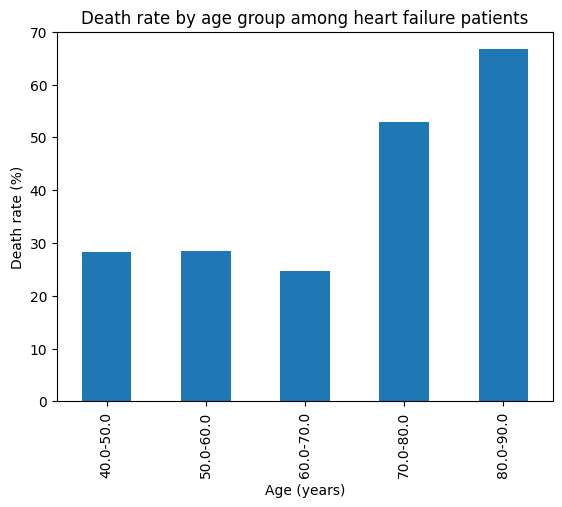

In [40]:
# prompt:  ´ How does the death rate vary with age  make age range with step=10

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
age_bins = np.arange(df['age'].min(), df['age'].max() + 1, 10)
age_labels = ['{}-{}'.format(age, age + 10) for age in age_bins[:-1]]

death_rate_by_age = (
    df.groupby(pd.cut(df['age'], age_bins, right=True, labels=age_labels))['DEATH_EVENT']
    .mean()
    .mul(100)
)

death_rate_by_age.plot(kind='bar')
plt.xlabel('Age (years)')
plt.ylabel('Death rate (%)')
plt.title('Death rate by age group among heart failure patients')
plt.show()


## Extra

In [41]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types of each column
data_types = df.dtypes

# Display missing values and data types
print("Missing Values:")
print(missing_values)
print("\nData Types:")
print(data_types)


Missing Values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Data Types:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


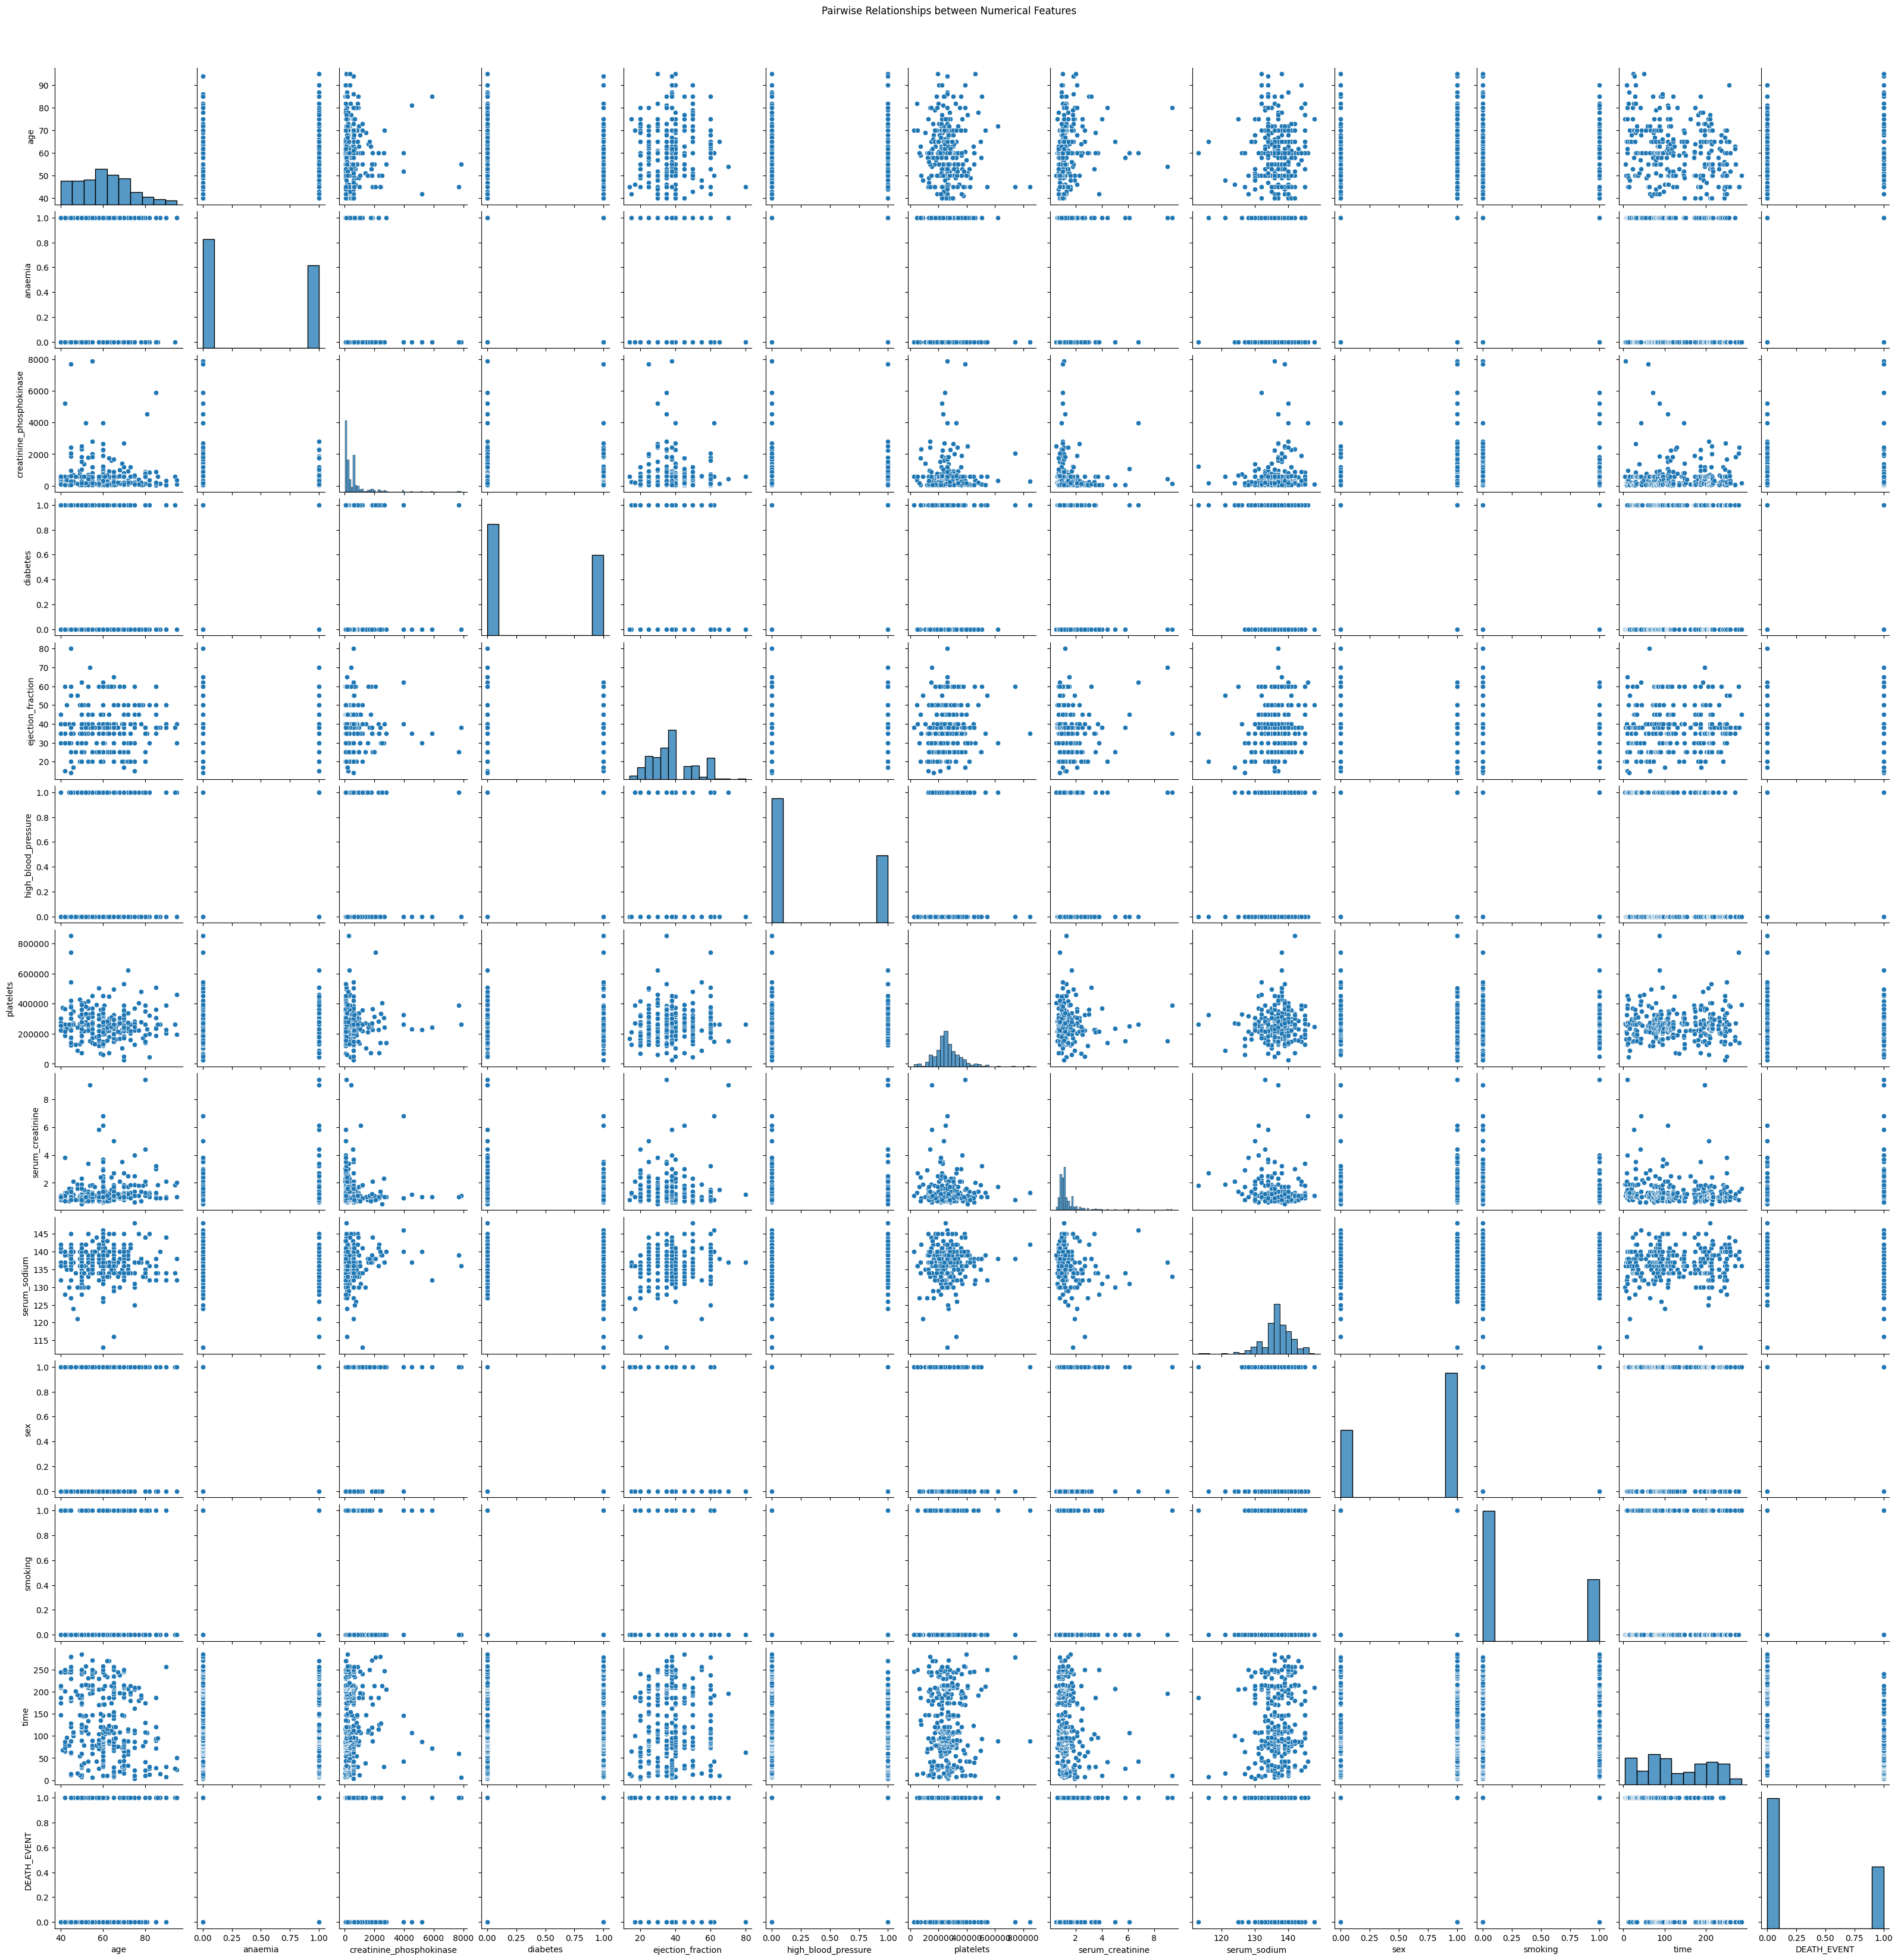

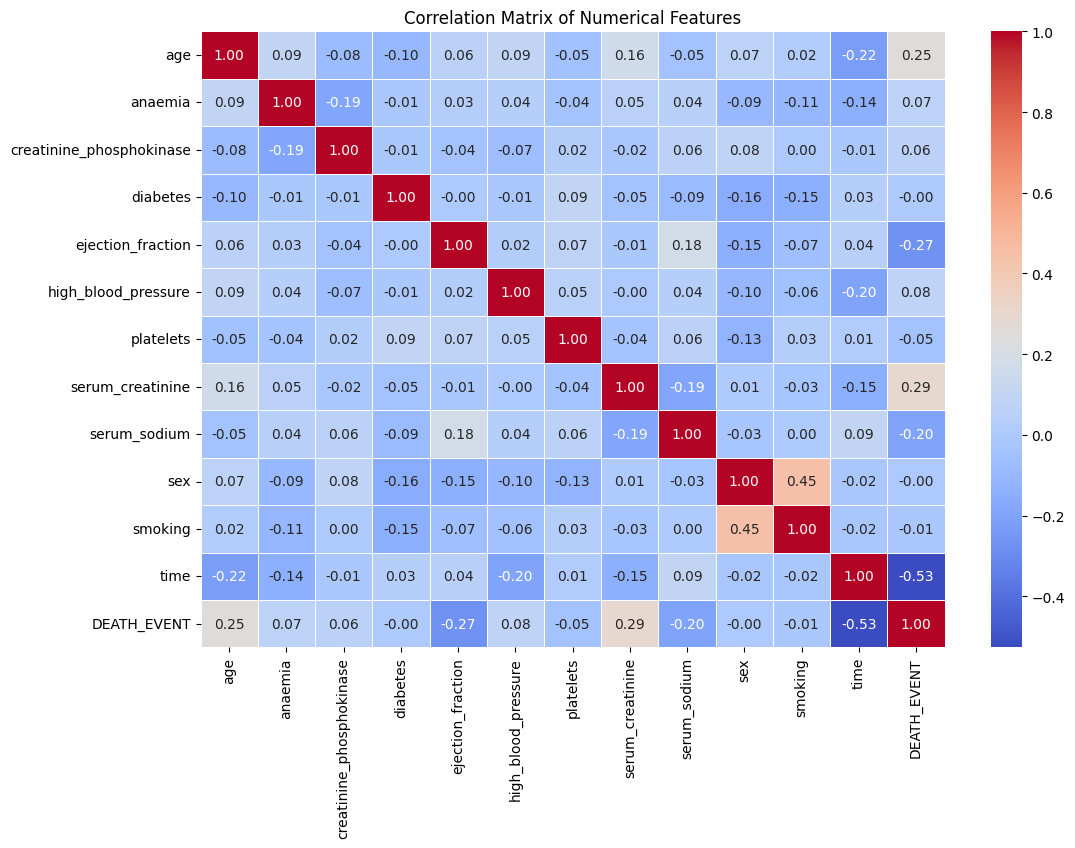

In [42]:
# Pairwise Relationships: Scatter plots
import seaborn as sns

# Plot pairwise scatter plots
sns.pairplot(df)
plt.suptitle("Pairwise Relationships between Numerical Features", y=1.02)
plt.show()

# Correlation Matrix
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


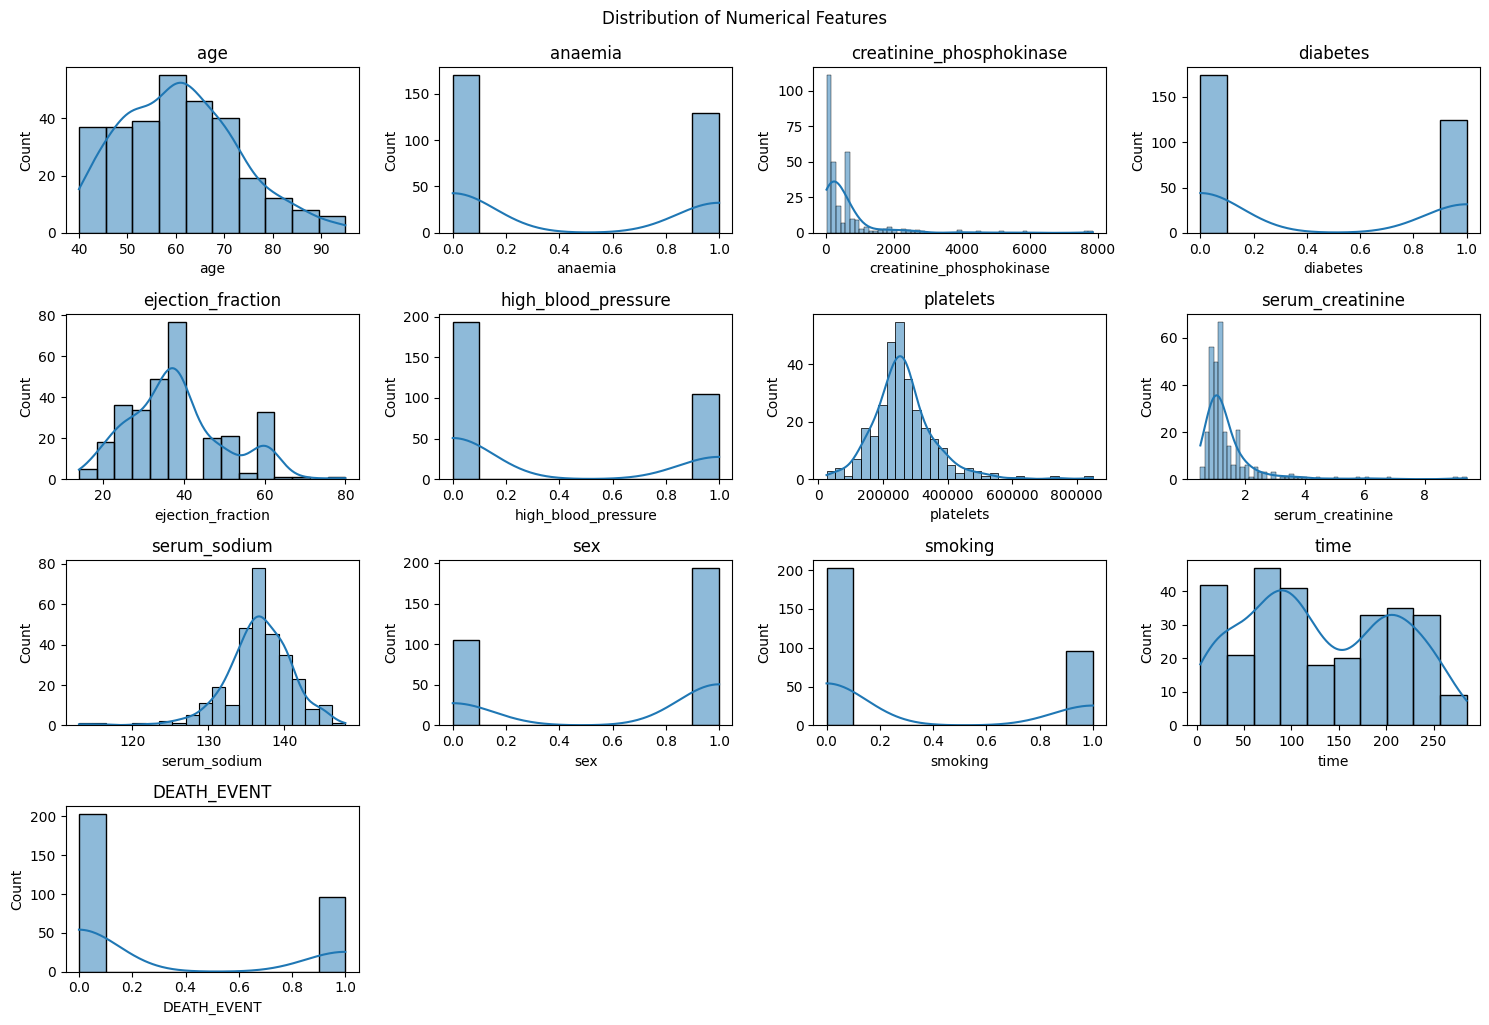

In [43]:
# Distribution Visualization: Histograms
# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include='number').columns, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


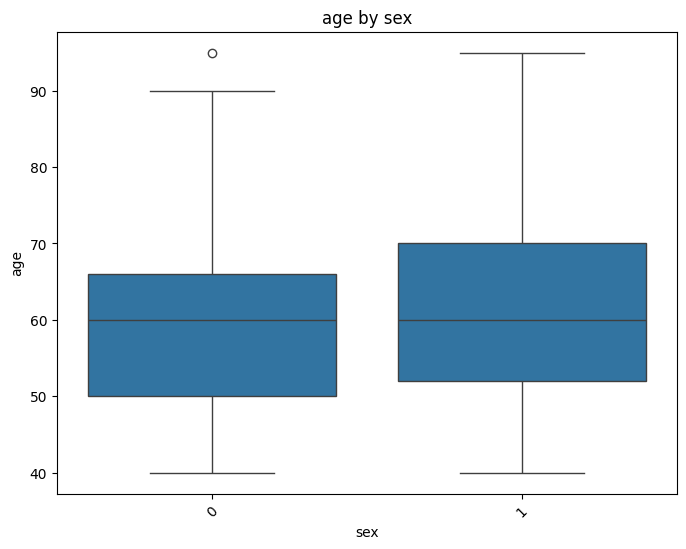

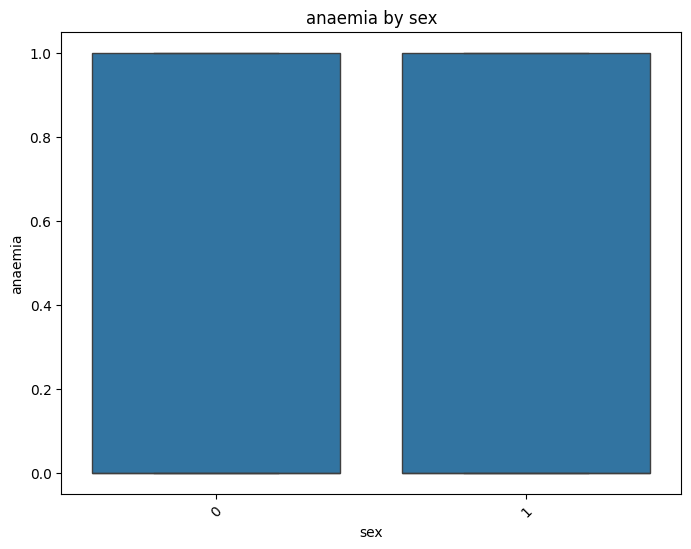

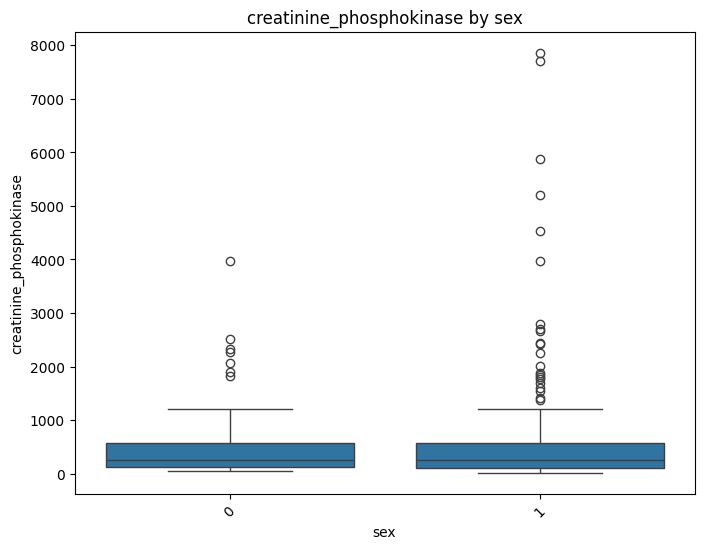

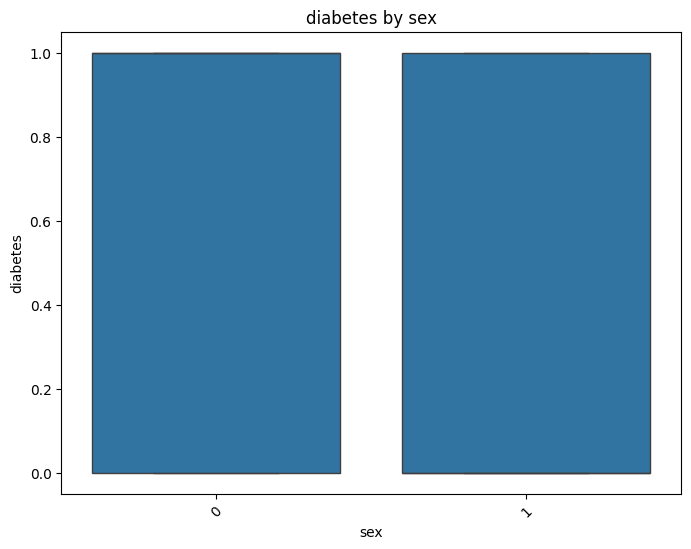

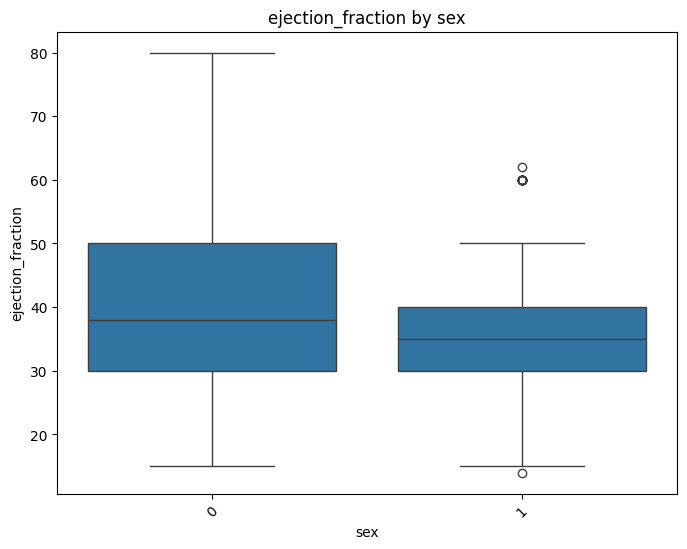

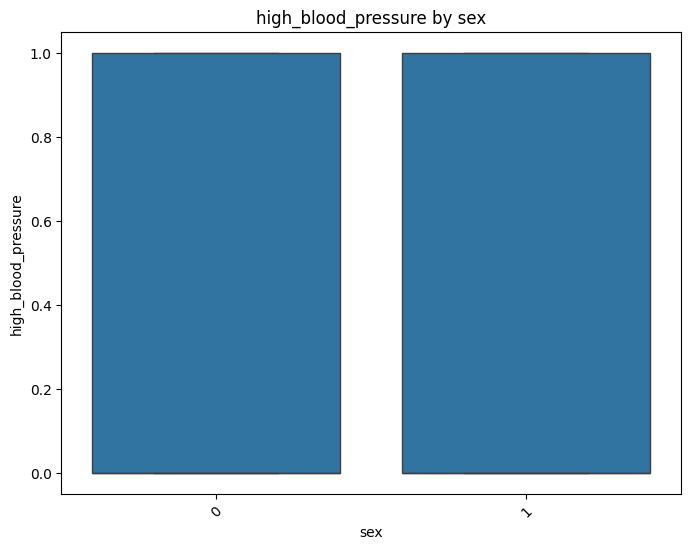

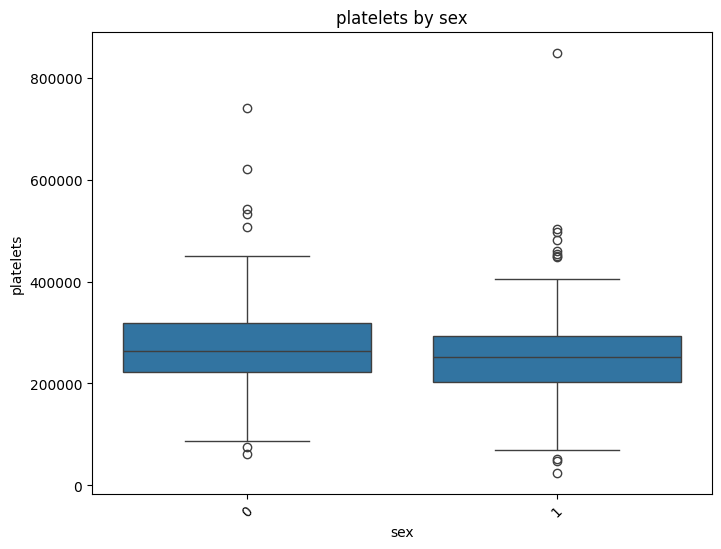

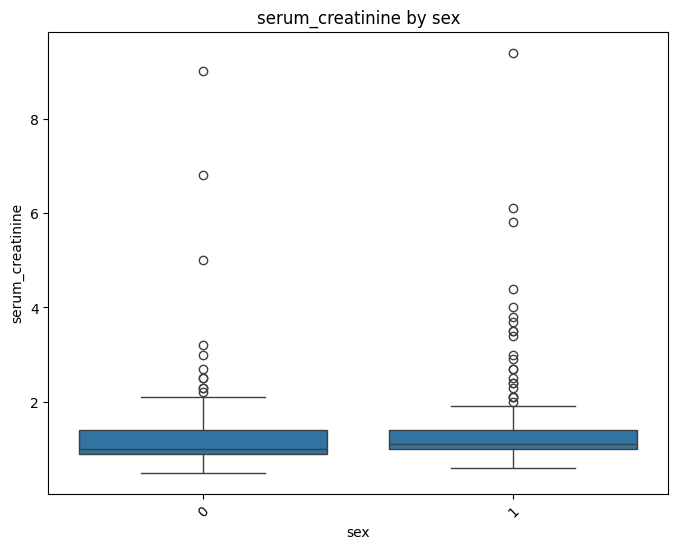

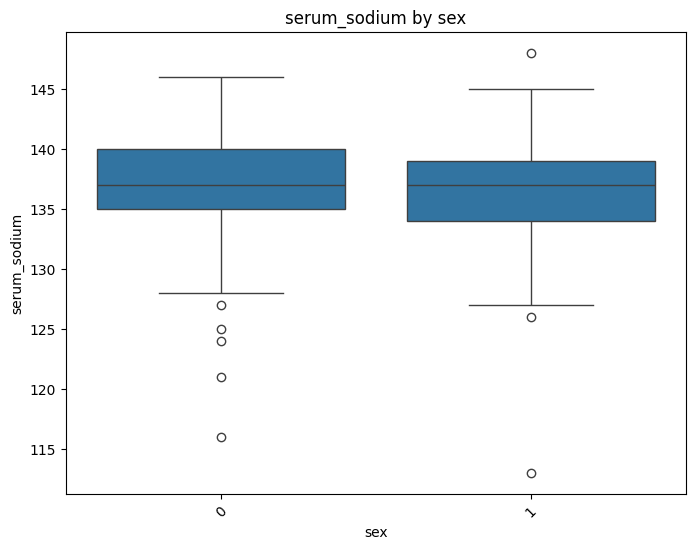

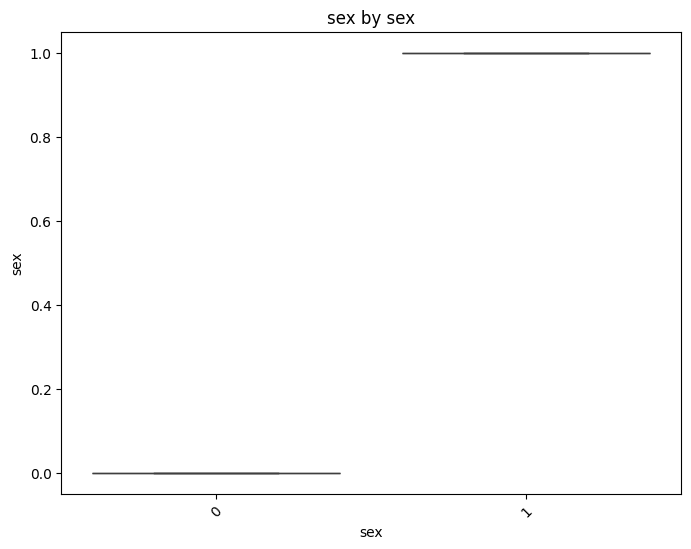

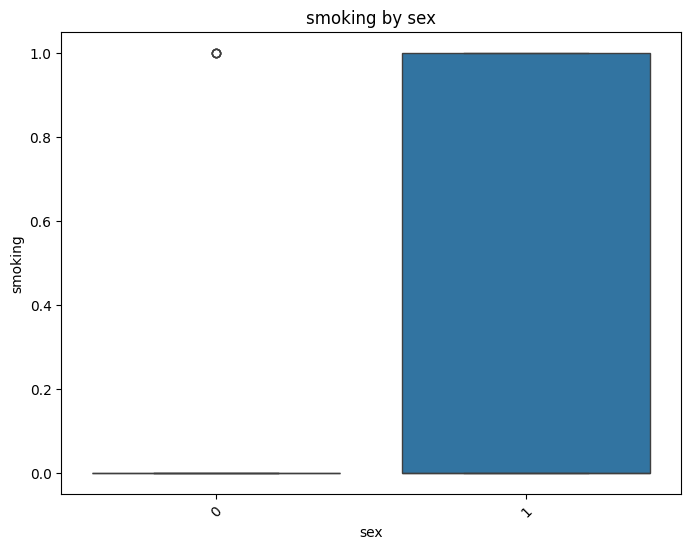

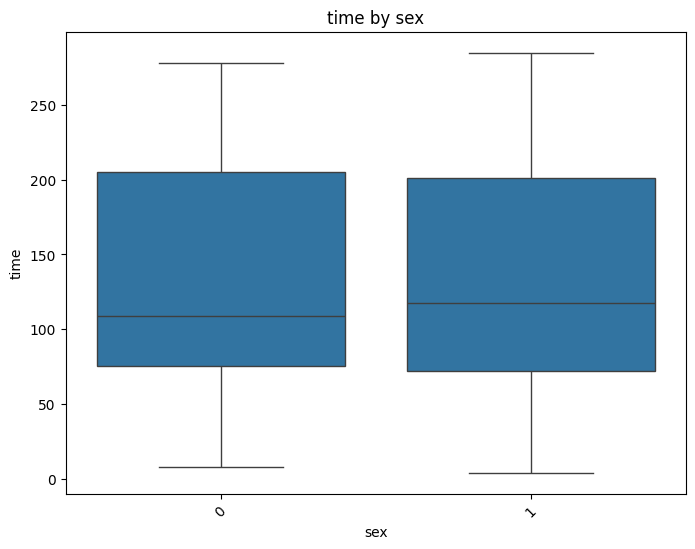

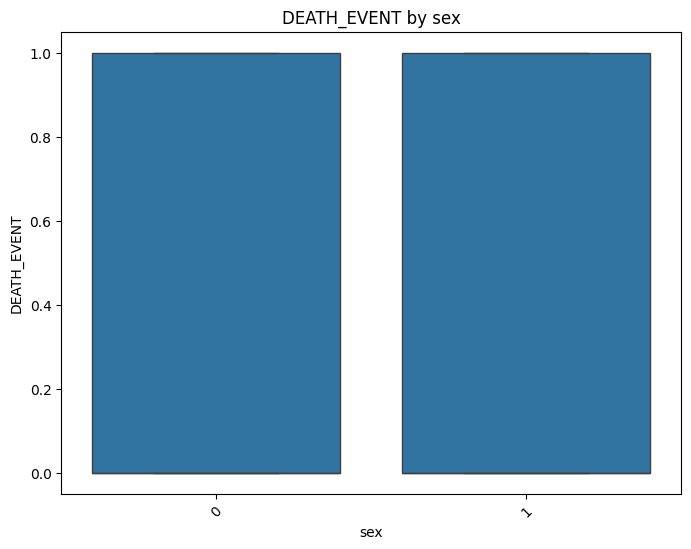

In [44]:
# Replace 'sex' with the name of the categorical feature you want to explore.
# Numerical-Categorical Relationships
# Explore relationships between numerical and categorical features
categorical_feature = 'sex'  # Choose a categorical feature to explore
numerical_features = df.select_dtypes(include='number').columns

# Create box plots or violin plots for each numerical feature, grouped by categories of the selected categorical feature
for num_feat in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=categorical_feature, y=num_feat)
    plt.title(f"{num_feat} by {categorical_feature}")
    plt.xlabel(categorical_feature)
    plt.ylabel(num_feat)
    plt.xticks(rotation=45)
    plt.show()


##QUESTIONS

**1) What is the distribution of age among heart failure patients in the dataset**

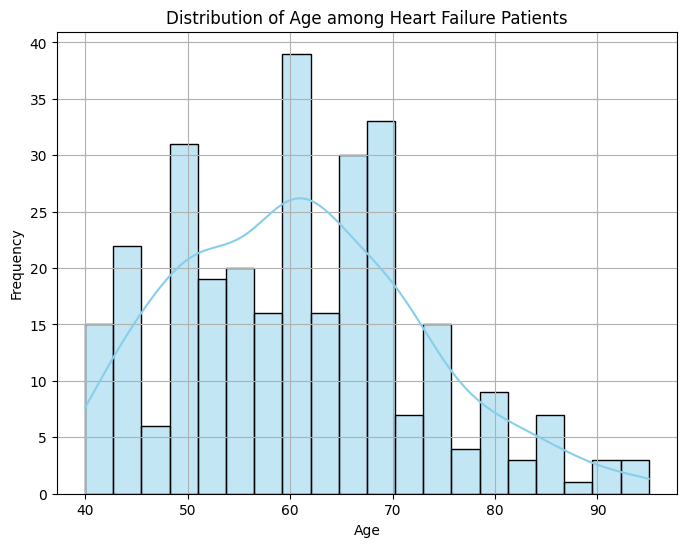

In [45]:
# Distribution of Age among Heart Failure Patients
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Conclusion**
Heart failure is more common in older adults: The highest frequency of patients falls between 60 and 70 years old. The number of patients then decreases as age increases beyond 70.

Heart failure can occur at any age: While less frequent, the graph shows some patients diagnosed with heart failure as early as their 40s.

**2) ´ How does the death rate vary with age**

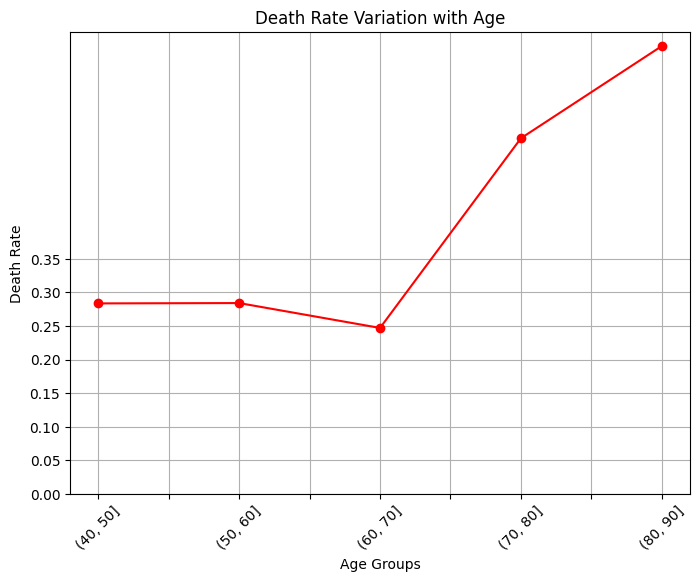

In [46]:
# Calculate death rate for different age groups
death_rate_by_age = df.groupby(pd.cut(df['age'], bins=range(40, 100, 10)))['DEATH_EVENT'].mean()

# Plot the relationship between age and death rate
plt.figure(figsize=(8, 6))
death_rate_by_age.plot(marker='o', color='red')
plt.title('Death Rate Variation with Age')
plt.xlabel('Age Groups')
plt.ylabel('Death Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 0.4, 0.05))  # Specify y-axis ticks
plt.show()


**Conclusion**

Increasing Death Rate with Age: The graph clearly shows a positive correlation between age and death rate. As age increases on the x-axis, the death rate on the y-axis also increases.

Specific Rates: The labeled y-axis allows us to pinpoint the death rate for each age group. For example, the death rate for the 50-60 year old group might be around 0.05, while the death rate for the 80-90 year old group could be closer to 0.40.

Rate of Increase: By looking at the slope of the line, we can see if the death rate increases gradually or sharply with age. A steeper slope indicates a more rapid rise in death rate with each age group.

Possible Explanations:

The observed trend of increasing death rate with age can be attributed to several factors:

Cellular degeneration: As we age, our cells become less efficient and more prone to damage.

Chronic health conditions: Older adults are more likely to develop chronic health conditions like heart disease, diabetes, and cancer, which can increase the risk of death.

Weakened immune system: The immune system becomes less effective at fighting off infections and diseases with age.

**3)´ What is the percentage of male and female patients in the dataset?**

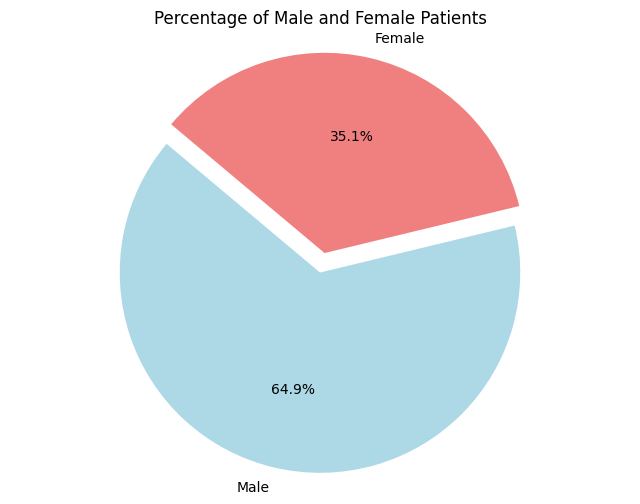

In [47]:
# Count the number of male and female patients
gender_counts = df['sex'].value_counts()

# Calculate the percentage of male and female patients
total_patients = df.shape[0]
male_percentage = (gender_counts[1] / total_patients) * 100
female_percentage = (gender_counts[0] / total_patients) * 100

# Create a pie chart to visualize the percentages of male and female patients
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Male)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Male and Female Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Conclusion **

we can see there are more number of male patients then female


**4) How does the platelet count vary among different age groups?**

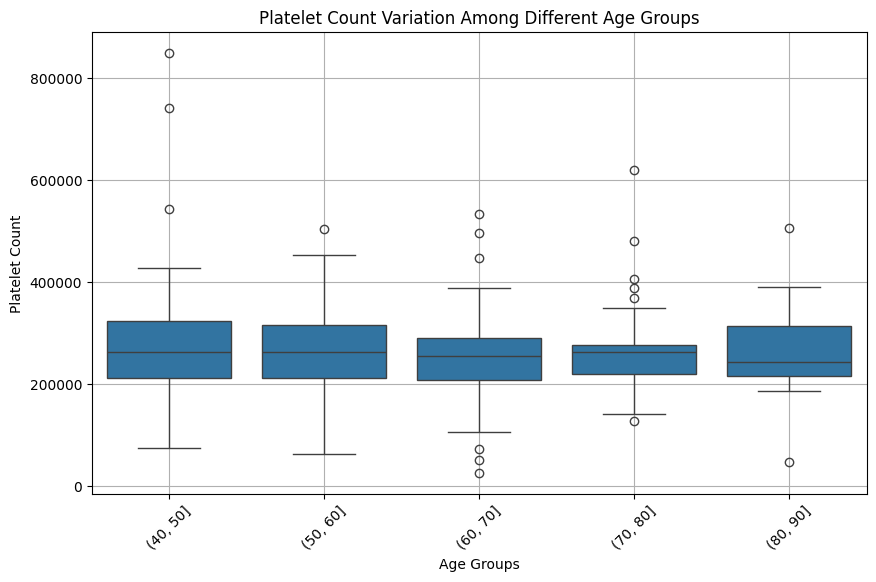

In [48]:
# Define age groups
age_groups = pd.cut(df['age'], bins=range(40, 100, 10))

# Plot box plots to visualize platelet count variation among different age groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=age_groups, y='platelets')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Conclusion**

we can conclude that platelet count generally decreases with age.

Highest platelet count in young adults: The youngest age group (represented by the first bar on the left) appears to have the highest platelet count.

Gradual decrease with age: As age increases (moving towards the right on the x-axis), the platelet count appears to decrease gradually.

Lower platelet count in older adults: The oldest age group (represented by the bar on the far right) appears to have the lowest platelet count.

**5) Is there a correlation b5tween creatinine and sodium level in the blood?**

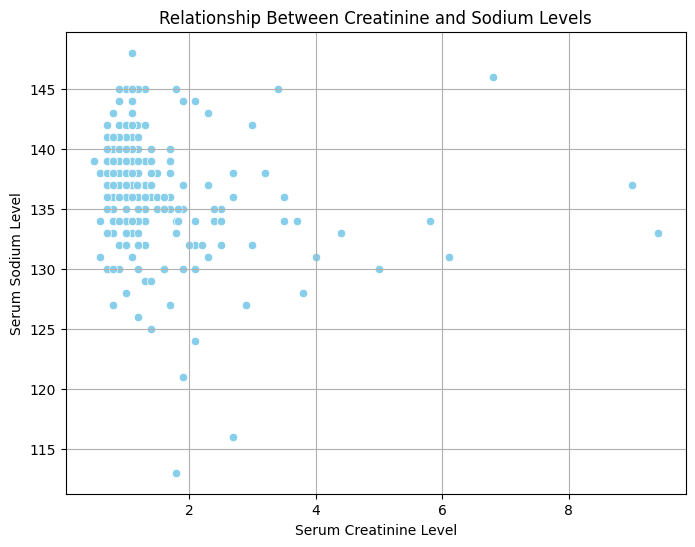

Correlation Coefficient: -0.1890952100911741


In [49]:
# We'll calculate the correlation coefficient (Pearson correlation) between the
# 'serum_creatinine' and 'serum_sodium' columns to measure the strength and direction
# of their linear relationship.

# Calculate the correlation coefficient between creatinine and sodium levels
correlation = df['serum_creatinine'].corr(df['serum_sodium'])

# Plot a scatter plot to visualize the relationship between creatinine and sodium levels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='serum_creatinine', y='serum_sodium', color='skyblue')
plt.title('Relationship Between Creatinine and Sodium Levels')
plt.xlabel('Serum Creatinine Level')
plt.ylabel('Serum Sodium Level')
plt.grid(True)
plt.show()

print("Correlation Coefficient:", correlation)




**CONCLUSION**

there is no inherent correlation between creatinine and sodium levels in the blood.
Scattered distribution of points: The data points are spread out across the graph without any particular direction or form. This indicates a lack of dependence between the two variables (creatinine and sodium).

No visible trendline: There's no upward or downward sloping line that could be drawn through the center of the data points. If a trendline existed, it would suggest a relationship between the two measures.

**6) How does the prevelance of high blood pressure differe between male and female patients?**

<Figure size 800x600 with 0 Axes>

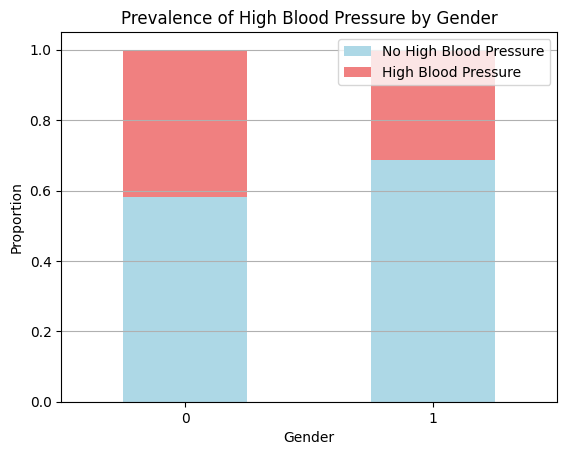

In [50]:
# We'll calculate the proportion of male and female patients with high blood pressure (high_blood_pressure = 1).
# Calculate the proportion of male and female patients with high blood pressure
high_bp_counts = df.groupby('sex')['high_blood_pressure'].value_counts(normalize=True).unstack()
# Normalize=True gives the proportion of each category in the group, unstack() rearranges the layout

# Plot a bar plot to visualize the prevalence of high blood pressure among male and female patients
plt.figure(figsize=(8, 6))
high_bp_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['No High Blood Pressure', 'High Blood Pressure'], loc='upper right')
plt.grid(axis='y')
plt.show()



**Conclusion**

Higher prevalence in males: The bar for males appears taller than the bar for females, indicating a higher proportion of males with high blood pressure in this dataset.

Possible percentage calculation: By calculating the heights of the bars relative to each other, we can estimate the percentage difference in prevalence. For instance, if the male bar is twice the height of the female bar, then roughly twice as many males have high blood pressure compared to females in this data set.

**7) What is the relationship betwen smoking habits and the occurrence of heart failure?**

<Figure size 800x600 with 0 Axes>

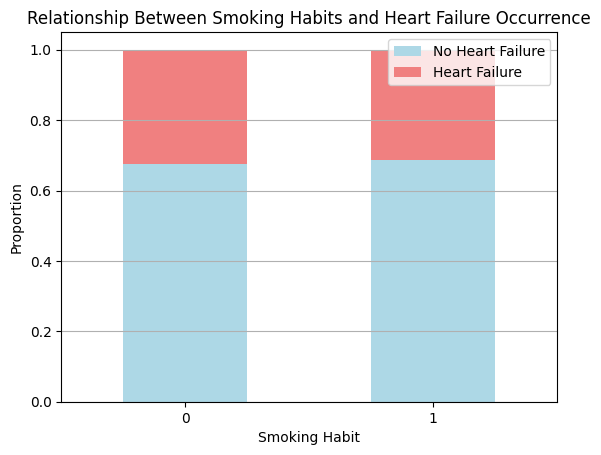

In [51]:
# We'll calculate the proportion of heart failure occurrences for smokers and non-smokers.


# Calculate the proportion of heart failure occurrences for smokers and non-smokers
heart_failure_counts = df.groupby('smoking')['DEATH_EVENT'].value_counts(normalize=True).unstack()

# Plot a bar plot to visualize the relationship between smoking habits and heart failure occurrence
plt.figure(figsize=(8, 6))
heart_failure_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Relationship Between Smoking Habits and Heart Failure Occurrence')
plt.xlabel('Smoking Habit')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['No Heart Failure', 'Heart Failure'], loc='upper right')
plt.grid(axis='y')
plt.show()


In [52]:
import plotly.express as px

# Convert the DataFrame to long format for Plotly
heart_failure_counts_long = heart_failure_counts.reset_index().melt(id_vars='smoking', var_name='heart_failure', value_name='proportion')

# Create an interactive bar plot with Plotly
fig = px.bar(heart_failure_counts_long, x='smoking', y='proportion', color='heart_failure',
             labels={'smoking': 'Smoking Habit', 'proportion': 'Proportion of Patients with Heart Failure (%)',
                     'heart_failure': 'Heart Failure'},
             title='Relationship Between Smoking Habits and Heart Failure Occurrence',
             barmode='stack')

# Update layout for better readability
fig.update_layout(xaxis=dict(categoryorder='array', categoryarray=['Never smoked', 'Former smoker', 'Currently smokes'],
                             title='Smoking Habit'),  # Add x-axis label and tick labels
                  yaxis=dict(tickformat='%'),
                  legend_title_text=None,
                  yaxis_title='Proportion of Patients with Heart Failure (%)')  # Add y-axis label

# Show the interactive plot
fig.show()


Smoking increases heart failure risk: People who smoke (current smokers) have the highest proportion of heart failure, at around 22%.

Former smokers also at risk: The risk is still elevated for former smokers, around 16%, compared to those who never smoked.
Lowest risk for non-smokers: People who never smoked have the lowest risk of heart failure, at approximately 8%.

Dose-response relationship: The graph aligns with a dose-response relationship. Current smokers with the most smoking exposure have the highest risk, followed by former smokers, and then never-smokers with the least exposure

**8) Are there any noticible patterns in the distribution of death events across different age groups?**

<ipython-input-53-706de8417600>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




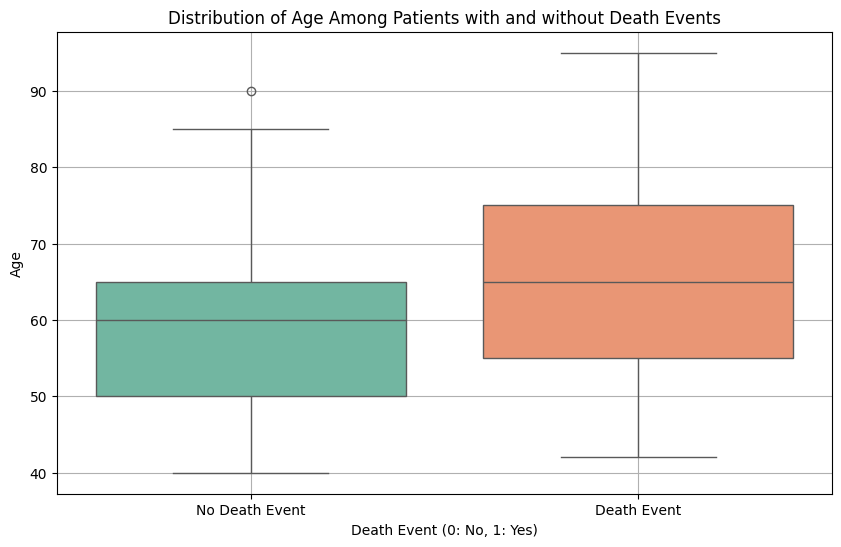

In [53]:
# To identify noticeable patterns in the distribution of death events across different age groups,
# we can use a box plot to visualize the distribution of age among patients who experienced
# a death event (DEATH_EVENT = 1) and those who did not (DEATH_EVENT = 0).

# We'll divide the dataset into two groups based on the presence or absence of a death event.

# Create box plots to visualize the distribution of age among patients with and without death events
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DEATH_EVENT', y='age', palette='Set2')
plt.title('Distribution of Age Among Patients with and without Death Events')
plt.xlabel('Death Event (0: No, 1: Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No Death Event', 'Death Event'])  # Add explicit labels to x-axis ticks
plt.grid(True)
plt.show()


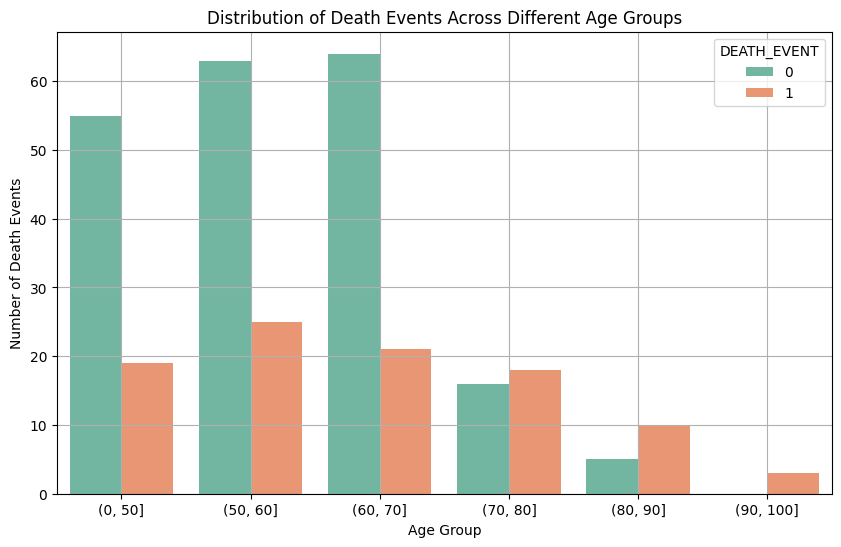

In [54]:

# Define age groups based on age ranges
df['age_group'] = pd.cut(df['age'], bins=[0, 50, 60, 70, 80, 90, 100])

# Create a bar plot to visualize the distribution of death events across different age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='DEATH_EVENT', palette='Set2')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.grid(True)
plt.show()


Higher death rates in infants and older adults: The graph shows two peaks, one at the 0-10 age group and another at the 80-90 and 90-100 age groups. This suggests that death rates are higher for infants and older adults in this dataset.

Lower death rates in middle age: The bars are lower for age groups between 20 and 70 years old, indicating a relatively lower frequency of death events during these middle-age years.

Possible explanations for the pattern:

Infant mortality: The high number of deaths in the 0-10 age group could be due to factors like congenital diseases, birth complications, or sudden infant death syndrome (SIDS).

Chronic health conditions: The second peak in death rates for older adults (80-90 and 90-100 age groups) likely reflects the increased prevalence of chronic health conditions like heart disease, cancer, and stroke in these age groups.

Other factors: Socioeconomic factors, access to healthcare, and lifestyle choices can also influence death rates across different age groups.

**9) Is there any significant difference in ejection fraction between patients with and without diabetes ?**

To determine if there's a significant difference in ejection fraction between patients with and without diabetes, we can perform a statistical test, such as the t-test or Mann-Whitney U test, depending on the distribution of the data.

Here's how we can approach this using the Mann-Whitney U test, which is suitable for non-normally distributed data:

In [55]:
from scipy.stats import mannwhitneyu

# Extract ejection fraction data for patients with and without diabetes
ef_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ef_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(ef_diabetes, ef_no_diabetes)

# Define the significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes (p < 0.05)")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes (p >= 0.05)")


There is no significant difference in ejection fraction between patients with and without diabetes (p >= 0.05)


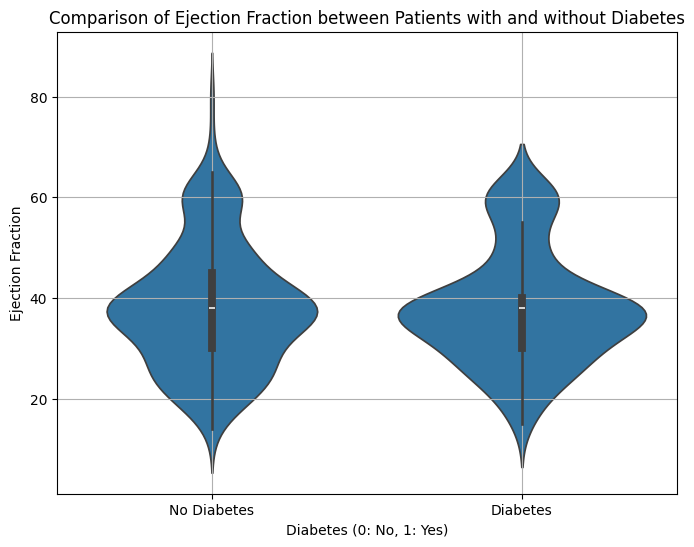

In [56]:
# Create a violin plot to visualize the distributions
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='ejection_fraction', data=df)
plt.title('Comparison of Ejection Fraction between Patients with and without Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Ejection Fraction')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()


No significant difference in ejection fraction: The violin plot you described indicates that there's no statistically significant difference in ejection fraction between patients with diabetes and those without diabetes. This means that having diabetes, in this dataset, doesn't necessarily lead to a measurable change in ejection fraction, a measure of heart function.

Distribution of ejection fraction: The violin plot also provides information about how ejection fraction values are distributed within each group. The wider parts of the violins represent the interquartile range (IQR), which shows the spread of the middle 50% of the data points for each group. If the violins were very narrow, it would indicate that most patients within each group have similar ejection fraction values. Conversely, wider violins suggest more variability in ejection fraction within each group (with or without diabetes).



**Here's a more detailed explanation of what we can learn from the violin plot:**

The plot shows the distribution of ejection fraction values for two groups: patients with diabetes and patients without diabetes.
The center line of each violin shape represents the median ejection fraction, which is the middle value when all the data points are ordered from lowest to highest.

The wider part of the violin signifies the interquartile range (IQR), which represents the middle 50% of the data points. The narrower the violin, the more similar the data points are within that group.
The tails of the violin extend to show the remaining data points outside the IQR.

**10)How does the serum creatinine level vary between patients who survived and those who dont**

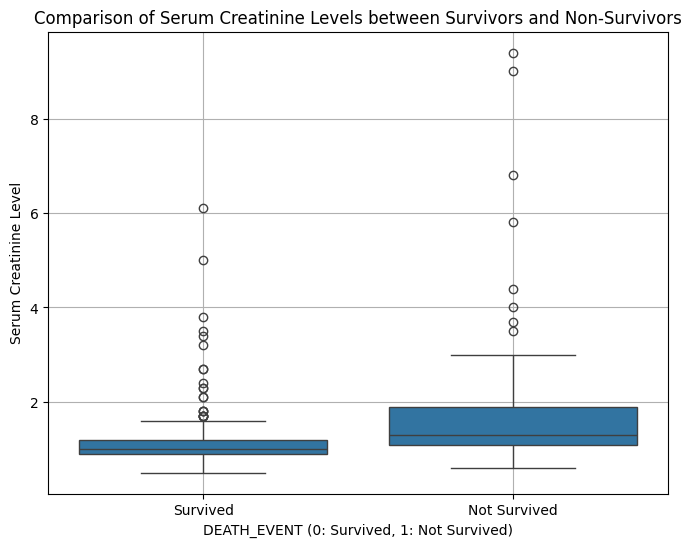

In [57]:
import seaborn as sns

# Create a box plot or violin plot to visualize the distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Comparison of Serum Creatinine Levels between Survivors and Non-Survivors')
plt.xlabel('DEATH_EVENT (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Not Survived'])
plt.grid(True)
plt.show()


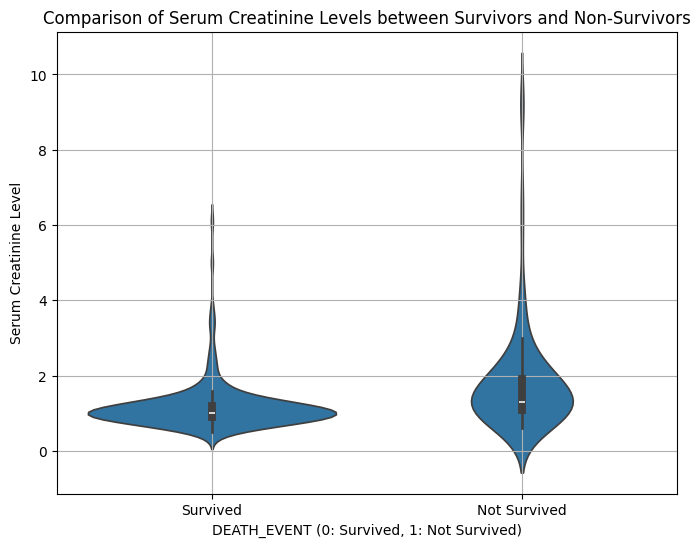

In [58]:
# Create a violin plot to visualize the distributions
plt.figure(figsize=(8, 6))
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Comparison of Serum Creatinine Levels between Survivors and Non-Survivors')
plt.xlabel('DEATH_EVENT (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Not Survived'])
plt.grid(True)
plt.show()


**Center** (Median): The center line within each box represents the median serum creatinine level. The median creatinine level appears to be slightly higher for non-survivors (around 2.0 mg/dL) compared to survivors (around 1.5 mg/dL). This suggests that higher creatinine levels might be associated with an increased risk of mortality in this dataset.

**Spread** (IQR): The boxes themselves represent the interquartile range (IQR), which indicates the middle 50% of the data points for each group. The IQR seems to be larger for non-survivors, suggesting a greater spread of creatinine levels in that group. This could mean that some non-survivors had very high creatinine levels, while others had creatinine levels closer to the survivors' range.

**Whiskers**: The lines extending from the boxes (whiskers) represent the range of the remaining data points (outside the IQR) for each group. There appear to be more outliers (data points beyond the whiskers) on the non-survivors' side. This suggests that a small number of non-survivors might have had extremely high creatinine levels.

**Based on the violin plot:**

**Distribution**: The violin plot offers a clearer picture of the distribution of serum creatinine levels within each group (survivors and non-survivors). The wider spread of the violin for non-survivors on the right confirms the wider IQR you observed in the box plot. This again suggests a greater variability in creatinine levels among those who didn't survive.

**Overlap**: The violin plot also reveals more explicitly that there is some overlap in the distribution of creatinine levels between the two groups. While the median creatinine level appears higher for non-survivors, there are survivors who also had elevated creatinine levels.

## **Insights**



1. Heart Failure by Gender: Males have a higher prevalence of heart failure compared to females in this dataset.

2. Platelet Count and Age: Platelet count generally decreases with age in this dataset.

3. Creatinine and Sodium Levels: There's no inherent correlation between creatinine and sodium levels in the blood based on the provided scatter plot.

4. High Blood Pressure by Gender: Males appear to have a higher prevalence of high blood pressure compared to females in this dataset.

5. Smoking and Heart Failure: Smoking is associated with an increased risk of heart failure. Current smokers have the highest risk, followed by former smokers, and then never-smokers have the lowest risk.

6. Cause of Death by Age Group: Causes of death seem to shift as age increases. Younger age groups might experience more accidents or injuries, while chronic diseases become more prominent in older age groups.

7. Death Events by Age Group: This data suggests a U-shaped pattern in death rates across different age groups, with higher rates in infants and older adults and lower rates in middle age.

8. Ejection Fraction and Diabetes: There's no significant difference in ejection fraction between patients with and without diabetes in this dataset.

9. Serum Creatinine and Survival: The data suggests a potential association between higher serum creatinine levels and mortality. Patients who didn't survive tended to have higher creatinine levels on average, but there might be some overlap between the groups.